In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import geopandas as gpd
import os
import cmocean.cm as cmo
import rasterio
import rasterio.plot as rplt
import app
import string
from affine import Affine
from rasterio.io import MemoryFile
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 0. Import

In [2]:
data_folder = r"D:\[Code]\HydrofractureShackleton_2023\data"
data_dmg_folder = r"D:\[Code]\HydrofractureShackleton_2023\data-dmg"
data_img_folder = r"D:\[Code]\HydrofractureShackleton_2023\data-img"
figure_folder = r"D:\[Code]\HydrofractureShackleton_2023\figures"

In [3]:
path = os.path.join(data_folder, r"shackleton_hydrofractures.xlsx")
events_raw = pd.read_excel(path, index_col=0).query("comment != 'refreeze'")
events_raw["geometry"] = gpd.GeoSeries.from_wkt(events_raw["geom_centroid_4326"])
events = gpd.GeoDataFrame(events_raw, geometry="geometry")  # type: ignore
events.set_crs("EPSG:4326", inplace=True)
events.sort_values("lon", inplace=True)
events.reset_index(drop=True, inplace=True)
events.to_crs("EPSG:3031", inplace=True)
events["label"] = list(string.ascii_uppercase)[: len(events)]
events["summer"] = [app.determine_antarctic_summer(d) for d in events["date-0 vis"]]
events["volume-1 m^3"] = np.nan_to_num(x=events["volume-1 m^3"].values, nan=0)  # type: ignore
events[["summer", "label", "geometry"]].to_file(os.path.join(data_folder, "shackleton_hydrofractures.shp"))
events

,lon,lat,lake,tile,date-0,sat-0,start-0,end-0,meandepth-0 m,volume-0 m^3,...,volume-1 m^3,sat-1 vis,date-1 vis,comment,geom_centroid_4326,geom_lake0_3031,geom_lake1_3031,geometry,label,summer
0,95.688019,-66.671201,105,183,2019-12-21,L8,2019-12-17,2019-12-25,0.972973,64799.986267,...,0.000000,S1,2019-12-27,NaN,POINT (95.68801944620978 -66.67120140922434),"POLYGON ((2557200 -256740, 2557290 -256740, 25...","POLYGON ((2557200 -256920, 2557260 -256920, 25...",POINT (2556275.678 -254610.402),A,2019
1,95.737264,-66.660983,97,183,2019-12-21,L8,2019-12-17,2019-12-25,1.139460,63581.877136,...,1742.883110,S1,2019-12-25,NaN,POINT (95.73726398795348 -66.66098334842171),"POLYGON ((2556180 -254280, 2556210 -254280, 25...",NaN,POINT (2557205.807 -256922.905),B,2019
2,95.759349,-66.646830,428,182,2020-01-06,L8,2020-01-02,2020-01-10,0.569657,64086.362457,...,6092.188454,S1,2020-01-11,NaN,POINT (95.75934933544644 -66.64682963582811),"POLYGON ((2555160 -447840, 2555250 -447840, 25...","MULTIPOLYGON (((2555400 -447930, 2555460 -4479...",POINT (2558699.399 -258069.242),C,2019
3,97.781752,-66.594966,56,182,2018-12-26,S2,2018-12-21,2018-12-31,0.633600,80023.718262,...,0.000000,L8,2019-01-05,NaN,POINT (97.781752069401 -66.59496564096317),"MULTIPOLYGON (((2554470 -349110, 2554500 -3491...",NaN,POINT (2553811.141 -349000.031),D,2018
4,98.104002,-66.492315,194,182,2020-02-04,S2,2020-01-30,2020-02-09,1.125474,109621.166992,...,5646.196747,S2,2020-02-03,NaN,POINT (98.10400213133633 -66.49231534293904),"POLYGON ((2563200 -364800, 2563260 -364800, 25...","MULTIPOLYGON (((2563260 -365040, 2563320 -3650...",POINT (2563306.902 -364995.272),E,2019
5,98.493578,-65.782618,614,182,2020-01-05,S2,2019-12-31,2020-01-10,0.583205,30501.635742,...,0.000000,S1,2020-01-08,NaN,POINT (98.49357799572716 -65.78261844755363),"MULTIPOLYGON (((2573070 -395850, 2573100 -3958...","MULTIPOLYGON (((2573040 -395880, 2573100 -3958...",POINT (2640302.345 -394293.286),F,2019
6,98.870325,-66.357777,358,182,2020-01-22,L8,2020-01-18,2020-01-26,0.767080,71798.723602,...,7308.135509,S1,2020-01-27,NaN,POINT (98.87032524604828 -66.35777722797837),"POLYGON ((2573340 -401340, 2573400 -401340, 25...","MULTIPOLYGON (((2573220 -401790, 2573280 -4017...",POINT (2573243.364 -401593.846),G,2019
7,99.719303,-66.264245,190,182,2020-01-06,L8,2020-01-02,2020-01-10,0.906136,57902.075958,...,3636.890888,S1,2020-01-11,NaN,POINT (99.7193031471739 -66.26424467999234),"POLYGON ((2577360 -441270, 2577390 -441270, 25...","MULTIPOLYGON (((2577420 -441390, 2577450 -4413...",POINT (2577450.447 -441465.448),H,2019
8,99.784536,-66.442883,931,182,2020-01-22,L8,2020-01-18,2020-01-26,1.456559,81275.990295,...,11201.078224,S1,2020-01-23,NaN,POINT (99.78453576622111 -66.44288327194984),"MULTIPOLYGON (((2557020 -441060, 2557050 -4410...","MULTIPOLYGON (((2557170 -440970, 2557200 -4409...",POINT (2557013.702 -440962.258),I,2019
9,99.855341,-66.446568,1052,182,2020-01-22,L8,2020-01-18,2020-01-26,1.618117,112135.487366,...,0.000000,S1,2020-01-23,NaN,POINT (99.85534096700347 -66.44656788578676),"POLYGON ((2555970 -443850, 2556030 -443850, 25...",NaN,POINT (2556055.907 -444050.452),J,2019


In [4]:
optical_files = [
    f
    for f in os.listdir(data_img_folder)
    if f.endswith(".tif") and f.split("_")[0] == "Optical"
]
sar_files = [
    f
    for f in os.listdir(data_img_folder)
    if f.endswith(".tif") and f.split("_")[0] == "Draining"
]

In [5]:
years = ["2018", "2019", "2020"]
xmin = 2.50e6
xmax = 2.76e6
ymax = -0.215e6
ymin = -0.591e6

In [6]:
coastline_folder = r"greene2022_coastlines"
all_coastline_files = os.listdir(coastline_folder)
coastlines = [
    gpd.read_file(os.path.join(coastline_folder, f)).cx[xmin:xmax, ymin:ymax]
    for f in all_coastline_files
    if f.endswith(".shp") and any([s in f for s in years])
]

In [7]:
buffer = 6e3
coastlines_buffer = [c.buffer(buffer) for c in coastlines]

In [8]:
iceshelves_folder = r"greene2022_iceshelves"
all_iceshelves_files = os.listdir(iceshelves_folder)
iceshelves = [
    gpd.read_file(os.path.join(iceshelves_folder, f)).cx[xmin:xmax, ymin:ymax]
    for f in all_iceshelves_files
    if f.endswith(".shp") and any([s in f for s in years])
]
ice_buffer = 150
for ice in iceshelves:
    ice.geometry = ice.buffer(ice_buffer)
    ice = ice.dissolve()
    ice.geometry = ice.buffer(-ice_buffer)
cmap = mpl.colormaps["cmo.ice"]
ice_colors = cmap(np.linspace(0.2, 0.8, 3))

buffer = 6e3
iceshelves_buffer = [i.buffer(buffer) for i in iceshelves]

In [9]:
lake_files = [
    r"L8S2_20181201_20190331_lakeextent.shp",
    r"L8S2_20191201_20200331_lakeextent.shp",
    r"L8S2_20201201_20210331_lakeextent.shp",]
all_lakes = [
    gpd.read_file(os.path.join(data_folder, f)).clip(iceshelves_buffer[i])
    for i, f in enumerate(lake_files)
]

In [10]:
for l in all_lakes:
    print(f"{l.area.sum() * 1e-6:3.0f} km²")

257 km²
261 km²
197 km²


In [11]:
lakes = all_lakes[1]
lakes.geometry = lakes.buffer(50)

lakes.to_file(os.path.join(data_folder, "lakes_extent.shp"))

In [12]:
grid_path = os.path.join(data_folder, r"ne_110m_graticules_1.shp")
grid = gpd.read_file(grid_path)  # https://www.naturalearthdata.com/about/terms-of-use/
grid.to_crs("EPSG:3031", inplace=True)
grid = grid.cx[xmin:xmax, ymin:ymax]
grid.head()

,degrees,direction,display,scalerank,dd,geometry
154,65,S,65 S,6,-65,"LINESTRING (-0.000 -2758494.765, 161.696 -2758..."
155,66,S,66 S,6,-66,"LINESTRING (2.365 -2644909.451, 155.038 -26449..."
156,67,S,67 S,6,-67,"LINESTRING (2.264 -2531747.008, 148.404 -25317..."
256,103,E,103 E,6,103,"LINESTRING (7.141 -1.648, 52938.639 -12219.281..."
257,102,E,102 E,6,102,"LINESTRING (7.169 -1.523, 53143.830 -11293.522..."


In [13]:
add = gpd.read_file(
    os.path.join(data_folder, r"add_coastline_high_res_line_v7_6.shp")
)
add.columns
add["surface"].unique()

shelf_lines = add[add["surface"].isin(["ice shelf and front"])]
grounding_lines = add[
    add["surface"].isin(
        [
            "ice coastline",
            "grounding line",
            "ice rumples",
            "rock against ice shelf",
            "rock coastline",
        ]
    )
]

shelf = shelf_lines.cx[xmin:xmax, ymin:ymax]
grounding_line = grounding_lines.cx[xmin:xmax, ymin:ymax]

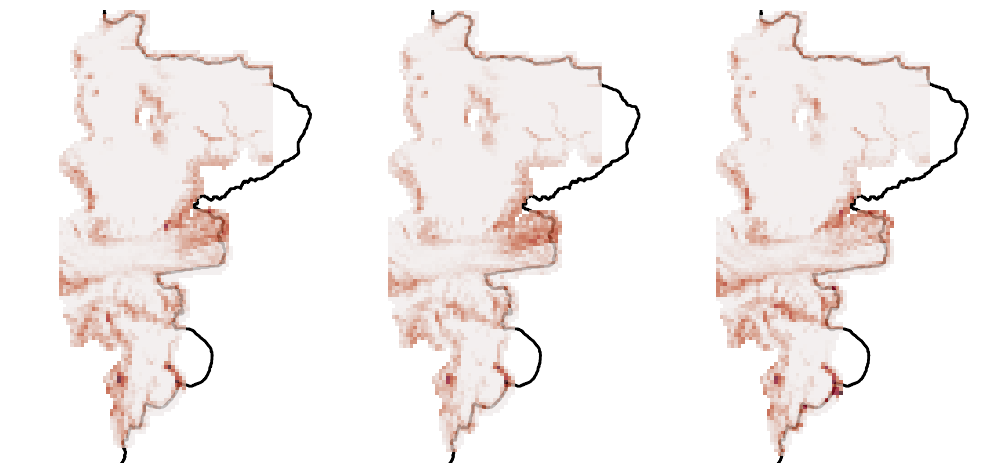

In [14]:
dmg_path = r"data-dmg"
delta_files = [
    "2018_S1_30m_delta-alpha.tif",
    "2019_S1_30m_delta-alpha.tif",
    "2020_S1_30m_delta-alpha.tif"]
dmg_files = [
    "2018_S1_30m_dmg.tif",
    "2019_S1_30m_dmg.tif",
    "2020_S1_30m_dmg.tif",
]
target_res = 3e3

dmg_outputs = []
dmg_transforms = []
fig, axes = plt.subplots(1, 3, figsize = (10, 20))
for i, f in enumerate(dmg_files):
    raster, transform = app.geotiffs.open_resampled(
        os.path.join(dmg_path, f), target_res, mode = "average"
    )
    masked, masked_transform = app.geotiffs.mask_dataset(
        raster, transform, iceshelves_buffer[i], mode="shape", filled=False
    )
    masked = masked
    masked = (masked / np.nanmax(masked)).copy()
    
    #masked[masked <= 0.1] = np.nan
    # masked = masked / np.nanmax(masked)
    ax = axes.ravel()[i]
    rplt.show(masked, ax=ax, transform=masked_transform, cmap="cmo.amp", alpha=0.8)
    coastlines[i].exterior.plot(ax=ax, color = "black", linewidth = 2, zorder = -5)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.axis("off")
    dmg_outputs.append(masked)
    dmg_transforms.append(masked_transform)
plt.tight_layout()
plt.show()

0.0 1.0 0.8432203389830508 0.13135593220338984 0.025423728813559324
0.0 1.0 0.8523389830508474 0.12542372881355932 0.02223728813559322
0.0 1.0 0.8492203389830508 0.12420338983050848 0.026576271186440677


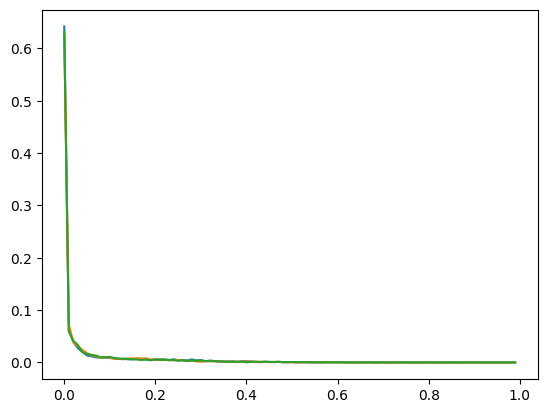

In [15]:
number_bins = 100
fig, ax = plt.subplots()
#ax.set_yscale("log")
for dmg in dmg_outputs:
    print(
        np.nanmin(dmg),
        np.nanmax(dmg),
        dmg[(~np.isnan(dmg)) & (dmg < 0.1)].size  / dmg[~np.isnan(dmg)].size,
        dmg[(~np.isnan(dmg)) & (dmg >= 0.1) & (dmg < 0.35)].size
        / dmg[~np.isnan(dmg)].size,
        dmg[(~np.isnan(dmg)) & (dmg > 0.35)].size
        / dmg[~np.isnan(dmg)].size,
    )
    counts, bins = np.histogram(dmg[~np.isnan(dmg)], bins=number_bins)
    ax.plot(bins[:-1], counts / counts.sum(), label=f"{np.nanmean(dmg):.2f}")

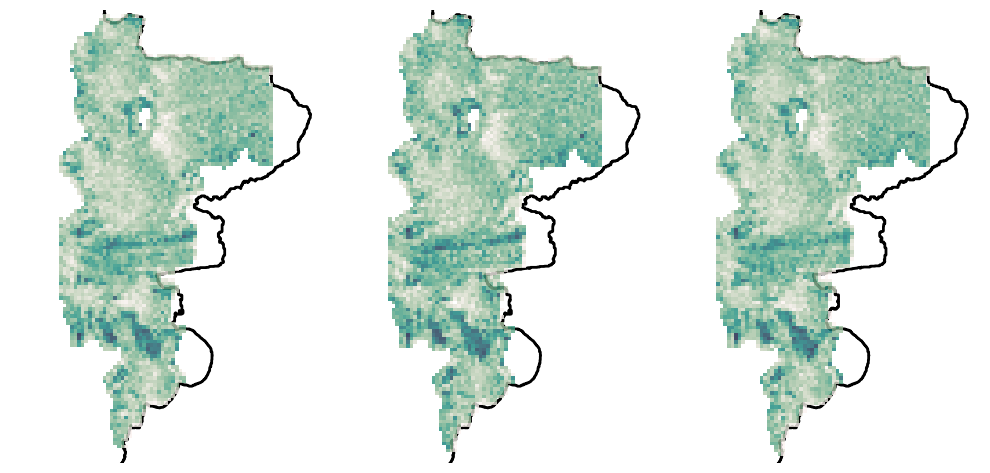

In [16]:
dmg_path = r"data-dmg"
delta_files = [
    "2018_S1_30m_delta-alpha.tif",
    "2019_S1_30m_delta-alpha.tif",
    "2020_S1_30m_delta-alpha.tif",
]

active_outputs = []
active_transforms = []

target_res = 3e3
fig, axes = plt.subplots(1, 3, figsize=(10, 20))
for i, f in enumerate(delta_files):
    raster, transform, meta = app.geotiffs.open(
        os.path.join(dmg_path, f)
    )

    activeness = app.geotiffs.create_active_crevasses_mask(raster, 45, 15)
    activeness_mask = np.zeros(activeness.shape) * 0
    activeness_mask[np.isfinite(activeness)] = 1
    resampled, resampled_transform = app.geotiffs.resample_dataset(
        activeness_mask, transform, target_res, mode="average"
    )
    resampled[resampled == 0] = np.nan
    masked, masked_transform = app.geotiffs.mask_dataset(
        resampled, resampled_transform, iceshelves_buffer[i], mode="shape", filled=False
    )
    masked = masked / np.nanmax(masked)
    #
    # print(np.nanmax(resampled), np.nanmin(resampled))
    # resampled[resampled <= 0.005] = np.nan

    ax = axes.ravel()[i]
    rplt.show(
        masked, ax=ax, transform=masked_transform, cmap="cmo.tempo", alpha=0.8
    )
    coastlines[i].exterior.plot(ax=ax, color="black", linewidth=2, zorder=-5)
    ax.set_xlim(transform.c, transform.c + raster.shape[-1] * transform.a)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.axis("off")
    active_outputs.append(masked)
    active_transforms.append(masked_transform)
plt.tight_layout()
plt.show()

0.00026237640905726233 1.0 0.07085478887744594 0.662615859938208 0.266529351184346
0.0015025721458357478 1.0 0.058365758754863814 0.613352447266025 0.3282817939791112
0.0004580796853225339 1.0 0.056338028169014086 0.6629924474382527 0.28066952439273324


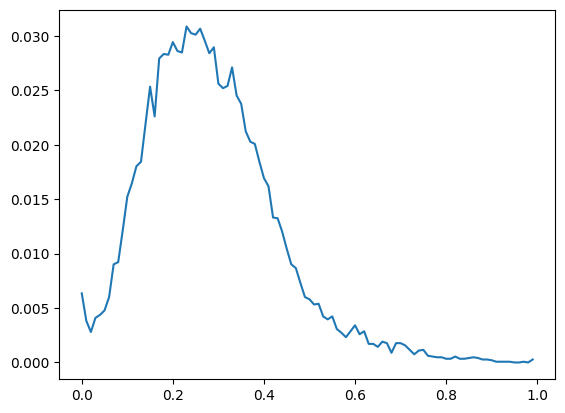

In [17]:
number_bins = 100

all_counts = np.zeros(number_bins)
all_bins = []
for act in active_outputs:
    print(
        np.nanmin(act),
        np.nanmax(act),
        act[(~np.isnan(act)) & (act < 0.1)].size / act[~np.isnan(act)].size,
        act[(~np.isnan(act)) & (act >= 0.1) & (act < 0.35)].size
        / act[~np.isnan(act)].size,
        act[(~np.isnan(act)) & (act > 0.35)].size / act[~np.isnan(act)].size,
    )
    counts, bins = np.histogram(act[~np.isnan(act)], bins=number_bins)
    all_counts += counts
fig, ax = plt.subplots()
# ax.set_yscale("log")
ax.plot(bins[:-1], all_counts / all_counts.sum(), label=f"{np.nanmean(act):.2f}")

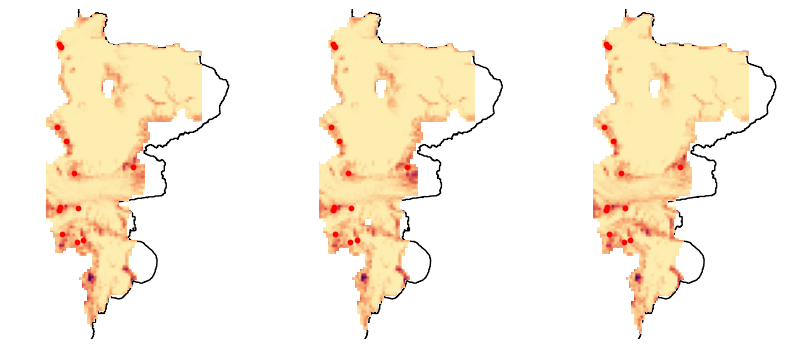

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 20))
for i, (dmg, act) in enumerate(zip(dmg_outputs, active_outputs)):
    combined = (1+dmg)**(1 + act)
    combined = combined / np.nanmax(combined)
    # combined[combined < 0.1] = np.nan

    ax = axes.ravel()[i]

    rplt.show(
        combined, ax=ax, transform=active_transforms[i], cmap="cmo.matter"
    )
    coastlines[i].exterior.plot(ax=ax, color="black", linewidth=1, zorder=-5)
    events.plot(ax=ax, color="red", markersize=10, zorder = 5)
    transform = active_transforms[i]
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.axis("off")
plt.show()

0.0 1.0 0.9338436303991252 0.0542646254784035 0.011891744122471296
0.0 1.0 0.9463050847457627 0.043661016949152545 0.010033898305084745
0.0 1.0 0.9369491525423729 0.051661016949152545 0.011389830508474577


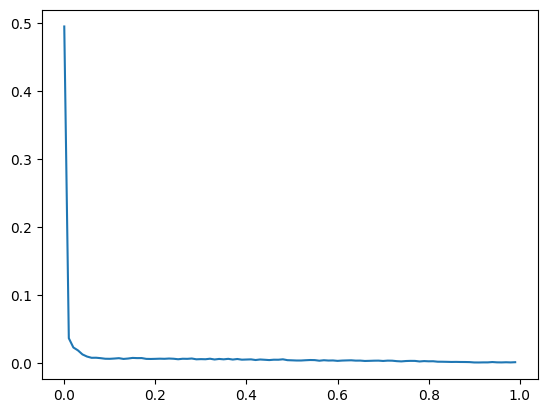

In [19]:
number_bins = 100

all_counts = np.zeros(number_bins)
all_bins = []
for dmg, act in zip(dmg_outputs, active_outputs):
    combined = dmg ** act
    combined = combined / np.nanmax(combined)
    print(
        np.nanmin(combined),
        np.nanmax(combined),
        combined[(~np.isnan(combined)) & (combined < 0.7)].size / combined[~np.isnan(combined)].size,
        combined[(~np.isnan(combined)) & (combined >= 0.7) & (combined < 0.9)].size
        / combined[~np.isnan(combined)].size,
        combined[(~np.isnan(combined)) & (combined > 0.9)].size / combined[~np.isnan(combined)].size,
    )
    counts, bins = np.histogram(combined[~np.isnan(combined)], bins=number_bins)
    all_counts += counts
fig, ax = plt.subplots()
# ax.set_yscale("log")
ax.plot(bins[:-1], all_counts / all_counts.sum(), label=f"{np.nanmean(combined):.2f}")

In [20]:
def get_value(raster: np.ndarray, transform: Affine, x: float, y: float):
    if raster.ndim == 2:
        count = 1
    elif raster.ndim > 3:
        raise ValueError("To High dimension of raster")
    else:
        count = raster.shape[0]
    with MemoryFile() as memfile:
        with memfile.open(
            driver="GTiff",
            height=raster.shape[-2],
            width=raster.shape[-1],
            count=count,
            dtype=raster.dtype,
            transform=transform,
        ) as dataset:
            if count == 1 and raster.ndim == 2:
                dataset.write(raster, 1)
            else:
                for i in range(count):
                    dataset.write(raster[i], i + 1)
            row, col = dataset.index(x, y)
            return dataset.read(1)[row, col]

In [21]:
dmg_values = []
dmg_percentile = []
active_values = []
active_percentile = []
combined_values = []
combined_percentile = []
for i, row in enumerate(events.iterrows()):
    row = row[1]
    i_summer = row["summer"] - 2019
    dmg_values.append(
        get_value(
            dmg_outputs[i_summer],
            dmg_transforms[i_summer],
            row["geometry"].x,
            row["geometry"].y,
        )
    )
    dmg_percentile.append(
        dmg_outputs[i_summer][dmg_outputs[i_summer] < dmg_values[-1]].size
        / dmg_outputs[i_summer][~np.isnan(dmg_outputs[i_summer])].size
    )
    active_values.append(
        get_value(
            active_outputs[i_summer],
            active_transforms[i_summer],
            row["geometry"].x,
            row["geometry"].y,
        )
    )
    active_percentile.append(
        active_outputs[i_summer][active_outputs[i_summer] < active_values[-1]].size
        / active_outputs[i_summer][~np.isnan(active_outputs[i_summer])].size
    )
    combined = dmg_outputs[i_summer] ** active_outputs[i_summer]
    combined = combined / np.nanmax(combined)
    #combined = combined / np.nanmax(combined)
    combined_values.append(
        get_value(
            combined,
            dmg_transforms[i_summer],
            row["geometry"].x,
            row["geometry"].y,
        )
    )
    combined_percentile.append(
        combined[combined < combined_values[-1]].size
        / combined[~np.isnan(combined)].size
    )
events["dmg"] = dmg_values
events["dmg_percentile"] = dmg_percentile
events["active"] = active_values
events["active_percentile"] = active_percentile
events["combined"] = combined_values
events["combined_percentile"] = combined_percentile
events

,lon,lat,lake,tile,date-0,sat-0,start-0,end-0,meandepth-0 m,volume-0 m^3,...,geom_lake1_3031,geometry,label,summer,dmg,dmg_percentile,active,active_percentile,combined,combined_percentile
0,95.688019,-66.671201,105,183,2019-12-21,L8,2019-12-17,2019-12-25,0.972973,64799.986267,...,"POLYGON ((2557200 -256920, 2557260 -256920, 25...",POINT (2556275.678 -254610.402),A,2019,0.330768,0.970476,0.202733,0.315757,0.799082,0.967469
1,95.737264,-66.660983,97,183,2019-12-21,L8,2019-12-17,2019-12-25,1.139460,63581.877136,...,NaN,POINT (2557205.807 -256922.905),B,2019,0.477186,0.992482,0.361948,0.763337,0.765071,0.955030
2,95.759349,-66.646830,428,182,2020-01-06,L8,2020-01-02,2020-01-10,0.569657,64086.362457,...,"MULTIPOLYGON (((2555400 -447930, 2555460 -4479...",POINT (2558699.399 -258069.242),C,2019,0.477186,0.992482,0.361948,0.763337,0.765071,0.955030
3,97.781752,-66.594966,56,182,2018-12-26,S2,2018-12-21,2018-12-31,0.633600,80023.718262,...,NaN,POINT (2553811.141 -349000.031),D,2018,0.477541,0.989966,0.512712,0.941212,0.685354,0.931797
4,98.104002,-66.492315,194,182,2020-02-04,S2,2020-01-30,2020-02-09,1.125474,109621.166992,...,"MULTIPOLYGON (((2563260 -365040, 2563320 -3650...",POINT (2563306.902 -364995.272),E,2019,0.265240,0.943958,0.338191,0.703193,0.638381,0.909650
5,98.493578,-65.782618,614,182,2020-01-05,S2,2019-12-31,2020-01-10,0.583205,30501.635742,...,"MULTIPOLYGON (((2573040 -395880, 2573100 -3958...",POINT (2640302.345 -394293.286),F,2019,0.504496,0.994259,0.172906,0.224923,0.888428,0.985785
6,98.870325,-66.357777,358,182,2020-01-22,L8,2020-01-18,2020-01-26,0.767080,71798.723602,...,"MULTIPOLYGON (((2573220 -401790, 2573280 -4017...",POINT (2573243.364 -401593.846),G,2019,0.314826,0.965145,0.185118,0.258084,0.807391,0.969792
7,99.719303,-66.264245,190,182,2020-01-06,L8,2020-01-02,2020-01-10,0.906136,57902.075958,...,"MULTIPOLYGON (((2577420 -441390, 2577450 -4413...",POINT (2577450.447 -441465.448),H,2019,0.014773,0.673182,0.616418,0.973635,0.074409,0.622198
8,99.784536,-66.442883,931,182,2020-01-22,L8,2020-01-18,2020-01-26,1.456559,81275.990295,...,"MULTIPOLYGON (((2557170 -440970, 2557200 -4409...",POINT (2557013.702 -440962.258),I,2019,0.237724,0.930837,0.655524,0.981874,0.389943,0.800847
9,99.855341,-66.446568,1052,182,2020-01-22,L8,2020-01-18,2020-01-26,1.618117,112135.487366,...,NaN,POINT (2556055.907 -444050.452),J,2019,0.307291,0.962821,0.498432,0.929969,0.555365,0.878075


In [22]:
limit0_dmg = 0.01
limit1_dmg = 0.35
limit0_act = 0.01
limit1_act = 0.35
limit0_combined = 0.01
limit1_combined = 0.35
dmg_res = []
act_res = []
combined_res = []
for i in range(len(dmg_outputs)):
    act = active_outputs[i]
    dmg = dmg_outputs[i]
    combined = dmg ** act
    combined = combined / np.nanmax(combined)

    dmg_res.append(
        np.array(
            [
                dmg[(~np.isnan(dmg)) & (dmg < limit0_dmg)].size
                / dmg[~np.isnan(dmg)].size,
                dmg[(~np.isnan(dmg)) & (dmg >= limit0_dmg) & (dmg < limit1_dmg)].size
                / dmg[~np.isnan(dmg)].size,
                dmg[(~np.isnan(dmg)) & (dmg > limit1_dmg)].size
                / dmg[~np.isnan(dmg)].size,
            ]
        )
    )
    act_res.append(
        np.array(
            [
                act[(~np.isnan(act)) & (act < limit0_act)].size
                / act[~np.isnan(act)].size,
                act[(~np.isnan(act)) & (act >= limit0_act) & (act < limit1_act)].size
                / act[~np.isnan(act)].size,
                act[(~np.isnan(act)) & (act > limit1_act)].size
                / act[~np.isnan(act)].size,
            ]
        )
    )
    combined_res.append(
        np.array(
            [
                combined[(~np.isnan(combined)) & (combined < limit0_combined)].size
                / combined[~np.isnan(combined)].size,
                combined[
                    (~np.isnan(combined))
                    & (combined >= limit0_combined)
                    & (combined < limit1_combined)
                ].size
                / combined[~np.isnan(combined)].size,
                combined[(~np.isnan(combined)) & (combined > limit1_combined)].size
                / combined[~np.isnan(combined)].size,
            ]
        )
    )

dmg_res = np.array(dmg_res).mean(axis = 0)
dmg_counts = np.array(
    [
        events[events["dmg"] < limit0_dmg]["dmg"].size,
        events[(events["dmg"] > limit0_dmg) & (events["dmg"] < limit1_dmg)]["dmg"].size,
        events[events["dmg"] > limit1_dmg]["dmg"].size,
    ]
)
act_res = np.array(act_res).mean(axis = 0)
act_counts = np.array(
    [
        events[events["active"] < limit0_act]["active"].size,
        events[(events["active"] > limit0_act) & (events["active"] < limit1_act)][
            "active"
        ].size,
        events[events["active"] > limit1_act]["active"].size,
    ]
)
combined_res = np.array(combined_res).mean(axis=0)
combined_counts = np.array(
    [
        events[events["combined"] < limit0_combined]["combined"].size,
        events[
            (events["combined"] > limit0_combined)
            & (events["combined"] < limit1_combined)
        ]["combined"].size,
        events[events["combined"] > limit1_combined]["combined"].size,
    ]
)
print(dmg_res, dmg_counts)
print(act_res, act_counts)
print(combined_res, combined_counts)

[0.63321487 0.34203937 0.02474576] [0 9 4]
[0.00614849 0.70202462 0.29182689] [0 5 8]
[0.49546528 0.28966612 0.2148686 ] [ 0  2 11]


0.0 1.0 0.9338436303991252 0.0542646254784035 0.011891744122471296
0.0 1.0 0.9463050847457627 0.043661016949152545 0.010033898305084745
0.0 1.0 0.9369491525423729 0.051661016949152545 0.011389830508474577


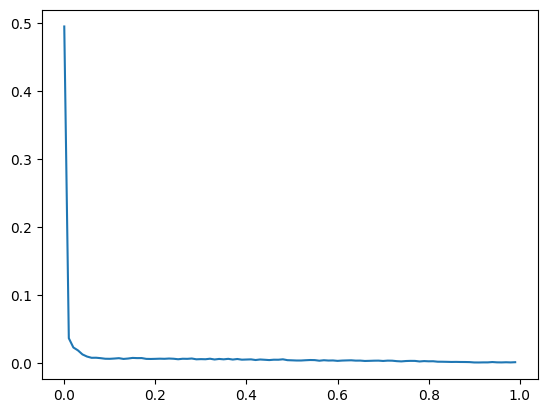

In [23]:
number_bins = 100

all_counts = np.zeros(number_bins)
all_bins = []
for dmg, act in zip(dmg_outputs, active_outputs):
    combined = dmg**act
    combined = combined / np.nanmax(combined)
    print(
        np.nanmin(combined),
        np.nanmax(combined),
        combined[(~np.isnan(combined)) & (combined < 0.7)].size
        / combined[~np.isnan(combined)].size,
        combined[(~np.isnan(combined)) & (combined >= 0.7) & (combined < 0.9)].size
        / combined[~np.isnan(combined)].size,
        combined[(~np.isnan(combined)) & (combined > 0.9)].size
        / combined[~np.isnan(combined)].size,
    )
    counts, bins = np.histogram(combined[~np.isnan(combined)], bins=number_bins)
    all_counts += counts
fig, ax = plt.subplots()
# ax.set_yscale("log")
ax.plot(bins[:-1], all_counts / all_counts.sum(), label=f"{np.nanmean(combined):.2f}")

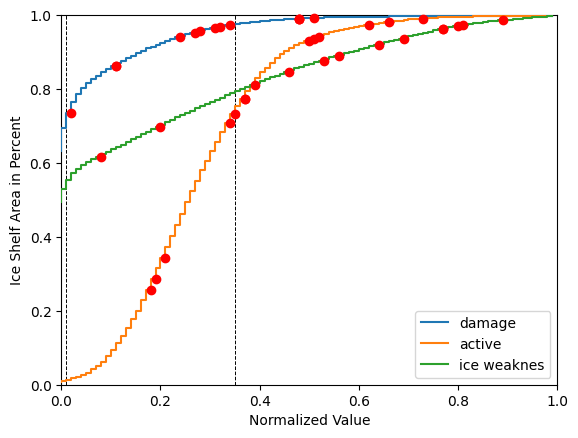

In [24]:
number_bins = 100
all_counts = np.zeros(number_bins)
all_bins = []
fig, ax = plt.subplots()
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.axvline(limit0_dmg, color="black", linestyle="--", lw = 0.7)
ax.axvline(limit1_dmg, color="black", linestyle="--", lw = 0.7)   
# ax.set_yscale("log")
counts_dmg = np.zeros((len(dmg_outputs), number_bins))
counts_act = np.zeros((len(dmg_outputs), number_bins))
counts_combined = np.zeros((len(dmg_outputs), number_bins))
for i in range(len(dmg_outputs)):
    dmg  = dmg_outputs[i]
    act = active_outputs[i]
    combined = dmg ** act
    combined = combined / np.nanmax(combined)

    counts_dmg[i], bins_eval = np.histogram(dmg[~np.isnan(dmg)], bins=number_bins)
    counts_act[i], bins_eval = np.histogram(act[~np.isnan(act)], bins=number_bins)
    counts_combined[i], bins_eval = np.histogram(
        combined[~np.isnan(combined)], bins=number_bins
    )
dmg_cumsum = np.cumsum(counts_dmg.mean(axis=0) / dmg_outputs[1][~np.isnan(dmg_outputs[1])].size)
act_cumsum = np.cumsum(counts_act.mean(axis=0) / active_outputs[1][~np.isnan(active_outputs[1])].size)
combined = dmg_outputs[1] ** active_outputs[1]
combined_cumsum = np.cumsum(
    counts_combined.mean(axis=0)
    / combined.size
)
ax.step(bins_eval[:-1], dmg_cumsum, label="damage", zorder=3)
for row in events.iterrows():
    row = row[1]
    ix = bins_eval[row["dmg"] > bins_eval].size
    ax.scatter(bins_eval[ix], dmg_cumsum[ix], clip_on=False, color="red", zorder=5)
ax.step(bins_eval[:-1], act_cumsum, label="active", zorder=3)
for row in events.iterrows():
    row = row[1]
    ix = bins_eval[row["active"] > bins_eval].size
    ax.scatter(bins_eval[ix], act_cumsum[ix], clip_on=False, color="red", zorder = 5)
ax.step(bins_eval[:-1], combined_cumsum, label="ice weaknes", zorder=3)
for row in events.iterrows():
    row = row[1]
    ix = bins_eval[row["combined"] > bins_eval].size
    ax.scatter(bins_eval[ix], combined_cumsum[ix], clip_on=False, color="red", zorder=5)

ax.set_xlabel("Normalized Value")
ax.set_ylabel("Ice Shelf Area in Percent")
ax.legend()
plt.show()

In [25]:
step_y = 3e3
events["y_offset"] = 0
events["connectionstyle"] = None

# A
events["y_offset"].values[0] = 5 * step_y
# B
events["y_offset"].values[1] = 0 * step_y
# C
events["y_offset"].values[2] = -5 * step_y
# D
events["y_offset"].values[3] = 0 * step_y
# E
events["y_offset"].values[4] = 0 * step_y
# F
events["y_offset"].values[5] = 4 * step_y
# G
events["y_offset"].values[6] = 0 * step_y
# H
events["y_offset"].values[7] = 7.5 * step_y
# I
events["y_offset"].values[8] = 2.5 * step_y
# J
events["y_offset"].values[9] = -1.5 * step_y
# K
events["y_offset"].values[10] = 2.5 * step_y
# L
events["y_offset"].values[11] = -0.5 * step_y
# M
events["y_offset"].values[12] = -4.5 * step_y



In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# Define a function to extract a portion of a colormap
def get_partial_colormap(cmap_name, start=0.0, stop=1.0, n_colors=256):
    cmap = plt.get_cmap(cmap_name)
    colors = cmap(np.linspace(start, stop, n_colors))
    return LinearSegmentedColormap.from_list(f"{cmap_name}_{start}_{stop}", colors)

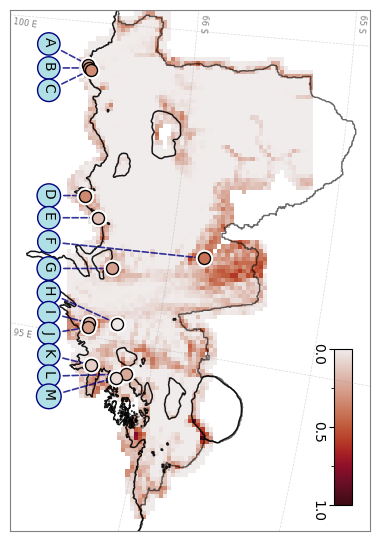

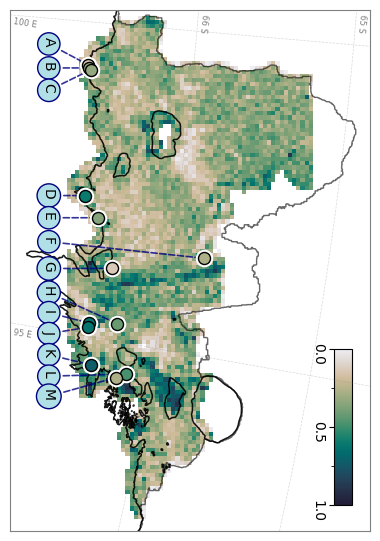

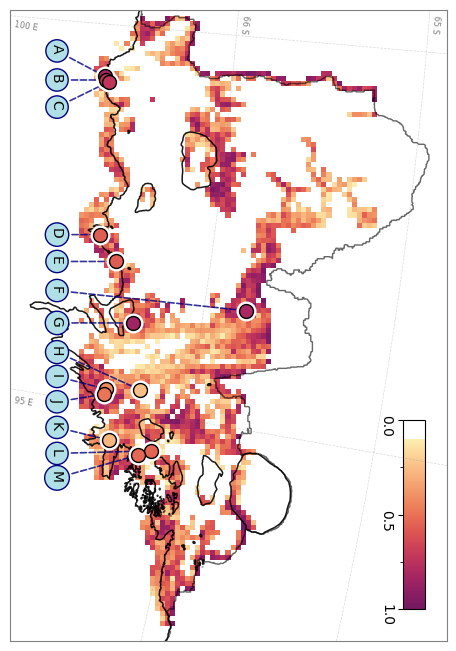

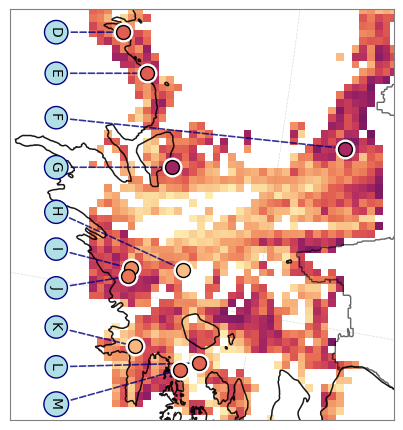

In [27]:
i_year = 1
year = years[i_year]

dmg = dmg_outputs[i_year] / np.nanmax(dmg_outputs[i_year])
act = active_outputs[i_year] / np.nanmax(active_outputs[i_year])
combined = dmg**act
combined /= np.nanmax(combined)
mask = (combined < 0.1) | (dmg < 0.01) | (act < 0.01)
combined[mask] = np.nan


height = 14 / 2.54
width = 10 / 2.54
scale = 1.2
height_big = height * scale
width_big = width * scale

total_height = height * 2
height_zoomed = total_height - height_big
width_zoomed = width_big

# xmin_z, xmax_z = 2.51e6, 2.70e6
ymax_z, ymin_z = -0.34e6, -0.50e6
deltay_zoomed = abs(ymax_z - ymin_z)
deltax_zoomed = deltay_zoomed / width_zoomed * height_zoomed
xmin_z = 2.51e6
xmax_z = xmin_z + deltax_zoomed

fig_dmg, ax_dmg = plt.subplots(
    figsize=(width, height)
)
fig_act, ax_act = plt.subplots(
    figsize=(width, height)
)
fig_combined, ax_combined = plt.subplots(
    figsize=(width_big, height_big)
)
fig_zoomed, ax_zoomed = plt.subplots(
    figsize=(width_zoomed, height_zoomed)
    )

axes = [ax_dmg, ax_act, ax_combined]
axes_silent = []
datas = [dmg, act, combined]
cmaps = [
    get_partial_colormap("cmo.amp", 0, 1),
    get_partial_colormap("cmo.rain", 0, 1),
    get_partial_colormap("cmo.matter", 0, 0.8),
    get_partial_colormap("cmo.matter", 0, 0.8),
]
ss = [75, 75, 100, 100]
ssp = [60, 60, 80, 80]

for i, (data, ax) in enumerate(zip(datas, axes)):
    rplt.show(data, ax=ax, transform=dmg_transforms[i_year], cmap=cmaps[i])
    fig_silent, ax_silent = plt.subplots()
    data_silent = ax_silent.imshow(data[0] / np.nanmax(data[0]), cmap=cmaps[i])
    plt.close()
    cax = ax.inset_axes([0.9, 0.05, 0.05, 0.3], transform=ax.transAxes)
    cbar = fig.colorbar(
        data_silent, cax=cax, orientation="vertical", ticklocation="left"
    )

    cbar.ax.yaxis.set_tick_params(rotation=-90, labelsize=10)
    cbar.ax.set_ylim(0, 1)
    cbar.ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    cbar.ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    cbar.ax.invert_yaxis()

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    values = []


rplt.show(
    combined,
    ax=ax_zoomed,
    transform=dmg_transforms[i_year],
    cmap=cmaps[2],
)
ax_zoomed.set_xlim(xmin_z, xmax_z)
ax_zoomed.set_ylim(ymin_z, ymax_z)

grid_filtered = gpd.GeoDataFrame(grid[grid["degrees"].isin([65, 66, 100, 95])].cx[xmin: xmax, ymin: ymax])
grid_filtered_S = grid_filtered.query("direction == 'S'")
grid_filtered_E = grid_filtered.query("direction == 'E'")
for i, (data, ax) in enumerate(zip(datas + [datas[-1]], axes + [ax_zoomed])):
    grid_filtered.plot(ax=ax, color="gray", linewidth=0.5, alpha=0.3, ls="--", zorder = 15)
    if i != 3:
        for i_s, row in enumerate(grid_filtered_S.iterrows()):
            ax.text(
                x=row[1]["geometry"].bounds[3] - 5e3,
                y=ymax - 3e3,
                s=f"{row[1]['degrees']} S",
                rotation=-96,
                ha="center",
                va="top",
                fontsize=6,
                color="gray",
                zorder=16,
            )
        ys = [
            ymax - 1e4,
            events["geometry"].values[9].y + events["y_offset"].values[9],
        ]
        for i_e, row in enumerate(grid_filtered_E.iterrows()):
            ax.text(
                x=xmin + 2e3,
                y=ys[i_e],
                s=f"{row[1]['degrees']} E",
                rotation=-9,
                ha="left",
                va="center",
                fontsize=6,
                color="gray",
                zorder=16,
            )
    coastlines[i_year].plot(ax=ax, facecolor="none", edgecolor="black", lw=1, alpha=0.6)
    grounding_line.plot(ax=ax, facecolor="none", edgecolor="black", lw=1.1, alpha=0.9)
    #lakes.plot(ax=ax, color="deepskyblue", alpha=1, zorder=1)
    ax.tick_params(
        axis="both",  # changes apply to the x-axis
        which="both",  # both major and minor ticks are affected
        bottom=False,  # ticks along the bottom edge are off
        top=False,  # ticks along the top edge are off
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False,
    )
    ax.spines["bottom"].set_color("gray")
    ax.spines["top"].set_color("gray")
    ax.spines["left"].set_color("gray")
    ax.spines["right"].set_color("gray")

    x_label = xmin + 2.8e4
    #cmap = plt.get_cmap(cmap_names[i])
    for e, event in enumerate(events["geometry"]):
        v = get_value(
            data,
            dmg_transforms[i_year],
            event.centroid.x,
            event.centroid.y,
        )
        gpd.GeoSeries(event).plot(ax=ax, color="white", markersize=ss[i] + ssp[i], zorder=19)
        gpd.GeoSeries(event).plot(
            ax=ax, edgecolor="black", facecolor=cmaps[i](v), markersize=ss[i], zorder=20
        )
        ax.annotate(
            events["label"].values[e]+ " ",
            rotation=-90,
            xy=(
                event.centroid.x,
                event.centroid.y,
            ),  # arrow location
            xycoords="data",
            xytext=(x_label, event.centroid.y + events["y_offset"].values[e]),
            arrowprops=dict(
                arrowstyle="-",
                color="navy",#"cornflowerblue",
                connectionstyle=events["connectionstyle"].values[e],
                ls="--",
                lw=1.2,
                alpha=0.8,
            ),
            ha="center",
            va="center",
            bbox=dict(
                edgecolor="navy", facecolor="powderblue", boxstyle="circle,pad=0.3"
            ),
            zorder = 18
        )

fig_label = ["a", "b", "c", "d"]
for ifig, fig in enumerate([fig_dmg, fig_act, fig_combined, fig_zoomed]):
    fig.tight_layout()
    fig.savefig(os.path.join(figure_folder, f"figure_02{fig_label[ifig]}.pdf"), dpi=300)
    fig.savefig(os.path.join(figure_folder, f"figure_02{fig_label[ifig]}.png"), dpi=300)
plt.show()

AttributeError: 'GeoDataFrame' object has no attribute 'x_offset'

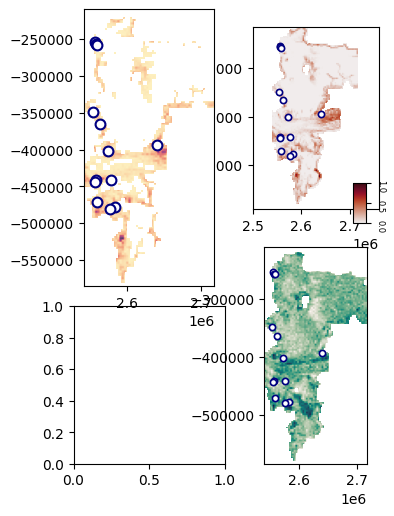

In [28]:
i_year = 1
year = years[i_year]
total_width = 15 / 2.54
dmg = dmg_outputs[i_year]
act = active_outputs[i_year]

xmin_z, xmax_z = 2.51e6, 2.70e6
ymax_z, ymin_z = -0.34e6, -0.50e6

fig, axes = plt.subplots(4, 2,
                        figsize=(10 / 2.54, total_width),
                        width_ratios=[1.2, 1],
                        height_ratios=[4, 1, 1, 4])

from mpl_toolkits.axes_grid1 import make_axes_locatable

"""Damage"""
gs = axes[0, 1].get_gridspec()
for ax in axes[:2, 1]:
    ax.remove()
fig_silent, ax_silent = plt.subplots()
dmg_silent = ax_silent.imshow(dmg[0], cmap="cmo.amp")
plt.close()

ax_dmg = plt.subplot(gs[:2, 1])
ax_dmg.imshow(dmg[0])
ax_dmg.set_xlim(xmin, xmax)
ax_dmg.set_ylim(ymin, ymax)
cax_dmg = ax_dmg.inset_axes([0.8, 0.1, 0.1, 1], transform=ax.transAxes)

cbar = fig.colorbar(dmg_silent, cax=cax_dmg)
cbar.ax.tick_params(rotation=-90, labelsize=6)

rplt.show(dmg, ax=ax_dmg, transform=dmg_transforms[i_year], cmap="cmo.amp")


"""Activeness"""
gs = axes[2, 1].get_gridspec()
for ax in axes[2:, 1]:
    ax.remove()
ax_act = fig.add_subplot(gs[2:, 1])
fig_silent, ax_silent = plt.subplots()
act_silent = ax_silent.imshow(act[0], cmap="cmo.tempo")
plt.close()


rplt.show(act, ax=ax_act, transform=active_transforms[i_year], cmap="cmo.tempo")

for ax in [ax_dmg, ax_act]:
    events.plot(
        ax=ax,
        color="white",
        markersize=20,
        zorder=5,
        marker="o",
        edgecolor="navy",
        lw=1.2,
    )

combined = dmg * act
combined[dmg < 0.005] = np.nan
combined /= np.nanmax(combined)

"""Combined"""
gs = axes[0, 0].get_gridspec()
for ax in axes[:3, 0]:
    ax.remove()
ax_combined = fig.add_subplot(gs[:3, 0])

rplt.show(
    combined,
    ax=ax_combined,
    transform=active_transforms[i_year],
    cmap="cmo.matter",
    alpha=0.8,
)
events.plot(ax=ax_combined, color="white", markersize=50, zorder=5, marker="o", edgecolor = "navy", lw = 1.5)
for i, s in enumerate(events["label"].values):
    ax_combined.text(
        s=s,
        x=events["geometry"].x[i] + events.x_offset[i],
        y=events["geometry"].y[i] + events.y_offset[i],
        rotation=-90,
    )
# lakes.plot(ax=ax_combined, color="deepskyblue", alpha=0.8, zorder=1)

"""Zoomed"""
ax_zoomed = axes[3, 0]
fig_silent, ax_silent = plt.subplots()
zoomed_silent = ax_silent.imshow(combined[0], cmap="cmo.matter")
# plt.close()

divider = make_axes_locatable(ax_zoomed)
cax = divider.append_axes("bottom", size="7%", pad=0.1)
cbar = fig.colorbar(zoomed_silent, cax=cax, orientation="horizontal")
cbar.ax.tick_params(rotation=-90, labelsize=6)

rplt.show(
    combined,
    ax=ax_zoomed,
    transform=active_transforms[i_year],
    cmap="cmo.matter",
    alpha=0.8,
)
events_zoomed = gpd.GeoDataFrame(events.cx[xmin_z:xmax_z, ymin_z:ymax_z]).reset_index(drop=True)
# lakes_zoomed = gpd.GeoDataFrame(lakes.cx[xmin_z:xmax_z, ymin_z:ymax_z]).reset_index(drop=True)
events_zoomed.plot(
    ax=ax_zoomed,
    color="white",
    markersize=50,
    zorder=5,
    marker="o",
    edgecolor="navy",
    lw=1.5,
)
# lakes_zoomed.plot(ax=ax_zoomed, color="deepskyblue", alpha=0.8, zorder=1)
for i, s in enumerate(events_zoomed["label"].values):
    ax_zoomed.text(
        s=s,
        x=events_zoomed["geometry"].x[i] + events_zoomed.x_offset[i],
        y=events_zoomed["geometry"].y[i] + events_zoomed.y_offset[i],
        rotation=-90,
    )

"""Grid"""
grid_filtered = grid[grid["degrees"].isin([65, 66, 100, 95])]
for ax in [ax_dmg, ax_act, ax_combined, ax_zoomed]:
    grid_filtered.plot(ax=ax, color="gray", linewidth=0.5, alpha=0.3, ls="--")
    coastlines[i_year].plot(ax = ax, facecolor="none", edgecolor='black', lw=1, alpha = 0.6)
    grounding_line.plot(ax = ax, facecolor="none", edgecolor='black', lw=1.1, alpha = 0.9)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.tick_params(
        axis="both",  # changes apply to the x-axis
        which="both",  # both major and minor ticks are affected
        bottom=False,  # ticks along the bottom edge are off
        top=False,  # ticks along the top edge are off
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False,
    )
# ax_zoomed.set_xlim(xmin_z, xmax_z)
# ax_zoomed.set_ylim(ymin_z, ymax_z)

# fig.tight_layout()
# fig.savefig(os.path.join(figure_folder, "figure_02.pdf"), dpi=300, orientation="portrait", bbox_inches="tight")
plt.show()

In [29]:
def analyze_flow_field(vx_raster, vy_raster, resolution: float, pix: int = 1):
    dudx = (vx_raster - np.roll(vx_raster, pix, axis=0)) / resolution
    dvdy = (vy_raster - np.roll(vy_raster, pix, axis=1)) / resolution
    dudy = (vx_raster - np.roll(vx_raster, pix, axis=1)) / resolution
    dvdx = (vy_raster - np.roll(vy_raster, pix, axis=0)) / resolution
    exx = 0.5 * (dudx + dudx)
    eyy = 0.5 * (dvdy + dvdy)
    exy = 0.5 * (dudy + dvdx)
    emax = (exx + eyy) * 0.5 + np.sqrt(np.power(exx - eyy, 2) * 0.25 + np.power(exy, 2))

    emin = (exx + eyy) * 0.5 - np.sqrt(np.power(exx - eyy, 2) * 0.25 + np.power(exy, 2))
    return emax, emin


with rasterio.open(os.path.join(dmg_path, "30m_vx.tif")) as vx:
    vx_raster = vx.read(1)
    vx_transform = vx.transform

with rasterio.open(os.path.join(dmg_path, "30m_vy.tif")) as vy:
    vy_raster = vy.read(1)
    vy_transform = vy.transform

emax, emin = analyze_flow_field(vx_raster, vy_raster, 300)
strain = abs(emax) / np.nanmax(abs(emax))

In [30]:
combined0 = dmg_outputs[1].copy() * active_outputs[1].copy()
combined0 = combined0 / np.nanmax(combined0)
combined1 = np.power(dmg_outputs[1].copy(), 1/2 * active_outputs[1].copy())
combined1 = combined1 / np.nanmax(combined1)
combined2 = np.power(active_outputs[1].copy(), dmg_outputs[1].copy())
combined2 = combined2 / np.nanmax(combined2)

In [ ]:
lakes = gpd.read_file(r"D:\[Code]\HydrofractureShackleton_2023\data\L8S2_20201201_20210331_lakeextent.shp")
lakes.shape

In [ ]:
active_values = []
dmg_values = []
combined0_values = []
combined1_values = []
combined2_values = []
strain_values = []
for i, geo in enumerate(events["geometry"]):
    combined0_values.append(get_value(combined0, transform, geo.x, geo.y))
    combined1_values.append(get_value(combined1, transform, geo.x, geo.y))
    combined2_values.append(get_value(combined2, transform, geo.x, geo.y))
    dmg_values.append(get_value(dmg_outputs[1], dmg_transforms[1], geo.x, geo.y))
    active_values.append(get_value(active_outputs[1], active_transforms[1], geo.x, geo.y))
    strain_values.append(get_value(strain, active_transforms[1], geo.x, geo.y))

In [ ]:
number_bins = 50
combined0_vs, combined0_xs = np.histogram(
    combined0[np.isfinite(combined0)], bins=number_bins
)
combined1_vs, combined1_xs = np.histogram(
    combined1[np.isfinite(combined1)], bins=number_bins
)
combined2_vs, combined2_xs = np.histogram(
    combined2[np.isfinite(combined2)], bins=number_bins
)
dmg_vs, dmg_xs = np.histogram(
    dmg_outputs[1][np.isfinite(dmg_outputs[1])] / np.nanmax(dmg_outputs[1]),
    bins=number_bins,
)
active_vs, active_xs = np.histogram(
    active_outputs[1][np.isfinite(active_outputs[1])] / np.nanmax(active_outputs[1]),
    bins=number_bins,
)
strain_vs, strain_xs = np.histogram(
    strain[np.isfinite(strain)],
    bins=number_bins,
)

fig, ax = plt.subplots()
ax.step(dmg_xs[:-1], dmg_vs, color="blue", alpha=0.5)
ax.step(combined0_xs[:-1], combined0_vs, color="lightcoral", alpha=0.7)
ax.step(combined1_xs[:-1], combined1_vs, color="red", alpha=0.5)
ax.step(combined2_xs[:-1], combined2_vs, color="darkred", alpha=0.5)
ax.step(active_xs[:-1], active_vs, color="olive", alpha=0.5)
ax.step(strain_xs[:-1], strain_vs, color="darkorange", alpha=0.5)
ax.set_yscale("log")

for i, geo in enumerate(events["geometry"]):
    if i == 0:
        label_dmg = "dmg"
        label_combined0 = "dmg * active"
        label_combined1 = "dmg^active"
        label_combined2 = "active^dmg"
        label_active = "active"
        label_strain = "strain"
    else:
        label_dmg = None
        label_combined0 = None
        label_combined1 = None
        label_combined2 = None
        label_active = None
        label_strain = None
    x_dmg = dmg_values[i]
    ax.scatter(
        x=x_dmg,
        y=dmg_vs[dmg_xs[:-1] > x_dmg][0],
        color="navy",
        label=label_dmg,
    )

    x_active = active_values[i]
    ax.scatter(x=x_active, y=active_vs[active_xs[:-1] > x_active][0], color="olive", label = label_active)

    x_combined0 = combined0_values[i]
    ax.scatter(
        x=x_combined0,
        y=combined0_vs[combined0_xs[:-1] > x_combined0][0],
        color="lightcoral",
        label=label_combined0,
    )
    

    x_combined1 = combined1_values[i]
    ax.scatter(
        x=x_combined1,
        y=combined1_vs[combined1_xs[:-1] > x_combined1][0],
        color="red",
        label=label_combined1,
    )
    try:
        x_combined2 = combined2_values[i]
        ax.scatter(
            x=x_combined2,
            y=combined2_vs[combined2_xs[:-1] > x_combined2][0],
            color="darkred",
            label=label_combined2,
        )
    except:
        pass
    x_strain = strain_values[i]
    ax.scatter(
        x=x_strain,
        y=strain_vs[strain_xs[:-1] > x_strain][0],
        color="darkorange",
        label=label_strain,
    )
# ax.set_xscale("log")
ax.legend()
plt.show()